# TensorFlow Tutorial 

Copyright 2018 weiliang

**TensorFlow™** is an open source software library for numerical computation using data flow graphs.
![tensorflow](./image/tensorflow.png)
**TensorFlow**采用数据、流、图（data &ensp; flow &ensp; graph）来计算。首先，需要创建一个数据流图，然后将数据（以张量(**tensor**)的形式存在）放入数据流图中计算，节点(**Nodes**)在图中表示数学操作，图中的线(**edges**)则表示在节点间相互联系的多维数组，即张量(tensor)。训练模型时tensor会不断重数据流图中的一个节点flow到另一个节点，这也就是为什么叫TensorFlow。  
![tensors_flowing](./image/tensors_flowing.gif)
**[TensorFlow](https://www.tensorflow.org/)**提供很多**API**，最低级别的**API:TensorFlow Core**,提供完成程序控制；其他高级**API**像**tf.estimator**用来管理数据集合，估量，训练和推理。  

In [1]:
import tensorflow as tf

上面的是TensorFlow程序的典型的**导入**语句，作用是赋予Python访问TensorFlow类(classes)，方法(methods)，符号(symbols)

check version

In [2]:
tf.__version__

'1.8.0'

### Everything is Tensor
**3** is a rank 0 tensor; this is a scalar with shape []  
**[1. ,2., 3.]** is a rank 1 tensor; this is a vector with shape [3]  
**[[1., 2., 3.], [4., 5., 6.]]** is a rank 2 tensor; a matrix with shape [2, 3]  
**[[[1., 2., 3.]], [[7., 8., 9.]]]** is a rank 3 tensor with shape [2, 1, 3] 
![tensor](./image/tensor.png)

## 1、The Computional Graph(计算图)
TensorFlow核心程序由两个独立部分组成：  
&ensp;&ensp;1、Building the computational graph（**构建计算图**）  
&ensp;&ensp;2、Running the computational graph （**运行计算图**） 
  
  
一个computation graph（计算图）是一系列的TensorFlow操作排列成一个节点图。  
下面先创建两个节点：  

In [4]:
node1 = tf.constant(3.0,dtype=tf.float32)
node2 = tf.constant(4.0) # also tf,float32 implicity
print("node1:",node1)
print("node2:",node2)

node1: Tensor("Const_2:0", shape=(), dtype=float32)
node2: Tensor("Const_3:0", shape=(), dtype=float32)


## 2、Session(会话)
若将结果打印出来，须使用<font color=Darkorange>Session.run()</font>命令:一个session封装了TensorFlow运行时的控制和状态

In [6]:
sess = tf.Session()
print(sess.run([node1,node2]))

[3.0, 4.0]


In [7]:
print('sess.run(node1):',sess.run(node1))
print('sess.run(node2):',sess.run(node2))

sess.run(node1): 3.0
sess.run(node2): 4.0


我们可以组合**Tensor**节点的操作（操作仍然是一个节点）来构造更为复杂的计算。 
  
  
下面构造一个加法运算：

In [8]:
add = tf.add(node1,node2)

In [9]:
print('add:',add)

add: Tensor("Add:0", shape=(), dtype=float32)


In [10]:
print('sess.run(add):',sess.run(add))

sess.run(add): 7.0


## 3、tensorboard
tensorflow中非常有用的可视化工具**tenosrboard**，它能展示一个计算图的图片和记录训练过程，常用来分析训练效果，理解训练框架

In [8]:
writer = tf.summary.FileWriter('logs/',sess.graph) # 保存将计算图。## tensorflow version <0.12 (tf.train.SummaryWriter())

在terminal(终端)上运行tensorboard：  
&ensp;&ensp;输入命令： <font color=Darkorange>tensorboard --logdir logs</font>  
&ensp;&ensp;同时将终端中的输出复制到浏览器中，便可以显示计算图了  
&ensp;&ensp;使用<font color=Darkorange>tensorboard --help</font> 查看更多详细参数

下图就展示了这个计算图：
![add](./image/add.png)

## 4、Placehoder(占位符)
一个计算图可以参数化的接收外部的输入，作为一个placeholder,一个占位符是允许后面提供一个值的。

In [11]:
a = tf.placeholder(dtype=tf.float32,shape=None)
b = tf.placeholder(dtype=tf.float32,shape=None)
adder_node = a + b # + provides a shortcut for tf.add(a,b)

## 5、feed_dict（传递字典）
参数传递具体值到run，可进行多个输入，并计算这个图

In [12]:
print(sess.run(adder_node,feed_dict={a:3,b:4.5})) # when only one operation to run
print(sess.run(adder_node,feed_dict={a: [1,3],b: [2,4]})) # when run multiple operations, run them together

7.5
[3. 7.]


In [11]:
writer = tf.summary.FileWriter('./logs/add/',sess.graph)

在Tensorboard中，计算图类似于这样：
![placeholder](./image/placeholder.png)

## 6、Variable（变量）
在机器学习，中我们通常想让一个模型可以接收任意多个值，保证模型可以被训练，在不改变输入的情况下，我们需要该变这个计算图获得一个新的输出。  
**Variable(变量)**允许我们增加可训练的参数到这个计算图中，构造时需要指定一个类型和初始值

#### Linear Regression
$$ y = -x + 1 $$
x = [1, 2, 3, 4]  
y = [0,-1,-2,-3]

#### (Linear)Hypothesis
$$H(x) = Wx+b $$

In [13]:
Weights = tf.Variable([.3],dtype=tf.float32)
biases = tf.Variable([-.3],dtype=tf.float32)
x = tf.placeholder(tf.float32)
linear_model = Weights * x + biases

运行下面这个命令将会出错！

In [14]:
#print(sess.run(linear_model,{x:[1,2,3,4]}))

当调用tf.Variable时变量是未被初始化的，在tensorflow程序中要想初始化这些变量，必须明确调用一个特定的操作:  
&ensp;&ensp;<font color=Darkorange>tf.global_variables_initializer()</font>

In [15]:
init = tf.global_variables_initializer()
sess.run(init)

In [16]:
print(sess.run(linear_model,{x:[1,2,3,4]}))

[0.         0.3        0.6        0.90000004]


我们创建了一个模型，需要在训练数据上对这个模型进行评估，这时需要一个**y**占位符来提供一个期望的值，并且需要设计一个**loss function**(损失函数),这个损失函数度量当前模型和提供数据间的误差
$$ loss = \frac{1}{m} \sum_{i=1}^{n}(H(x^{(i)}-y^{(i)})^{2} $$

In [17]:
y = tf.placeholder(tf.float32)
squared_deltas = tf.square(linear_model - y)
loss = tf.reduce_sum(squared_deltas)
print(sess.run(loss,{x:[1,2,3,4],y:[0,-1,-2,-3]}))

23.660002


### tf.assign
我们分配一个值给Weights和biases手动更改变量值$W=-1$,$b=1$计算损失

In [18]:
fixW = tf.assign(Weights,[-1.])
fixb = tf.assign(biases,[1.])
sess.run([fixW,fixb])
print('fix loss:',sess.run(loss,{x:[1,2,3,4],y:[0,-1,-2,-3]}))

fix loss: 0.0


## 7、tf.train API
TensorFlow 提供**optimizers（优化器）**，最简单的优化器是**gradient descent**(梯度下降)

Goal: Minimize loss
$$\min_{W,b} loss(W,b)$$

In [19]:
optimizer = tf.train.GradientDescentOptimizer(0.01)
train = optimizer.minimize(loss)
init = tf.global_variables_initializer()
sess.run(init) # reset values to incorrect defaults.

for step in range(1000):
    sess.run(train,{x:[1,2,3,4],y:[0,-1,-2,-3]})
    if step % 100 == 0:
        print(step,'Weights:',sess.run(Weights),'biases:',sess.run(biases))

0 Weights: [-0.21999997] biases: [-0.456]
100 Weights: [-0.84270465] biases: [0.5375326]
200 Weights: [-0.9528499] biases: [0.86137295]
300 Weights: [-0.98586655] biases: [0.9584459]
400 Weights: [-0.9957634] biases: [0.98754394]
500 Weights: [-0.99873006] biases: [0.9962662]
600 Weights: [-0.99961936] biases: [0.99888086]
700 Weights: [-0.9998859] biases: [0.9996646]
800 Weights: [-0.9999658] biases: [0.99989945]
900 Weights: [-0.9999897] biases: [0.9999697]


这样一个简单的线性回归模型就构建完成。

### 用matplotlib 将训练过程可视化

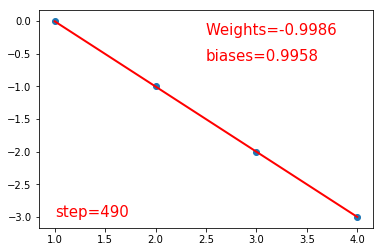

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
from IPython import display
x_data = [1,2,3,4]
y_data = [0,-1,-2,-3]
optimizer = tf.train.GradientDescentOptimizer(0.01)
train = optimizer.minimize(loss)
init = tf.global_variables_initializer()
sess.run(init) # reset values to incorrect defaults.
# plt.ion()

for step in range(500):
    sess.run(train,{x:x_data,y:y_data})
    if step % 10 == 0:
        y_pred = sess.run(Weights * x_data + biases)
        plt.cla()
        plt.scatter(x_data,y_data)
        plt.plot(x_data,y_pred, 'r-', lw=2)
        plt.text(1,-3,'step=%d'%step,fontdict={'size':15,'color':'red'})
        plt.text(2.5,-0.2,'Weights=%.4f'%sess.run(Weights),fontdict={'size':15,'color':'red'})
        plt.text(2.5,-0.6,'biases=%.4f'%sess.run(biases),fontdict={'size':15,'color':'red'})
        plt.pause(0.01)
        display.clear_output(wait=True)
# plt.ioff()
# plt.show()